We know:
$$\beta_m(z) = \sqrt{2 \gamma} \frac{c}{\omega_p(z)}$$

So $\beta_m(z)^2 * n(z)$ is a constant (assuming beam's energy $\gamma$ does not change). So:
$$\beta_m(z)^2 * n(z) = \beta_{m0}^2 * n_0$$
where $n_0$ is the density peak and $\beta_{m0}$ is the corresponding matched $\beta$. In the code (QPAD/QuickPIC) we usually set the peak density to be 1 in the plasma density profile. We also use the density peak's plasma skin depth as the normalization factor, so $\beta_{m0} = \sqrt{2\gamma}$ in normalized units. So we have:
$$\beta_m(z)^2 * n(z) = 2\gamma$$

Consider the Kernel function:
$$f(z) = 6(\frac{z}{a})^5-15(\frac{z}{a})^4+10(\frac{z}{a})^3$$
Its derivatives 
$$f'(z) = \frac{1}{a}[30(\frac{z}{a})^4-60(\frac{z}{a})^3+30(\frac{z}{a})^2] = \frac{30}{a}(\frac{z}{a})^2(\frac{z}{a}-1)^2$$
We notice that $f(0) = 0, f(a) = 1, f'(0) = f'(a) = 0$.

We let 
$$n_p(z) = (n_f - n_i) f(z) + n_i$$
So $n_p(0) = n_i$, $n_p(a) = n_f$. When $z$ increases from $0$ to $a$, $n_p(z)$ smoothly transitions from $n_i$ to $n_f$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pyVisQP import *

def warren_ramp(a,n_i,n_f = 1.0,N=1000):
    s = np.linspace(0,a,N)
    s_a = s / a
    fs = 6 * s_a ** 5 - 15 * s_a ** 4 + 10 * s_a ** 3
    fs = (n_f - n_i) * fs + n_i
    return s,fs

def get_beta_m(n,gamma): # Assume max(np) == 1
    return np.sqrt(2 * gamma / n)

def get_alpha_m(s,beta_m):
    return -0.5*NDiff1D(s,beta_m)

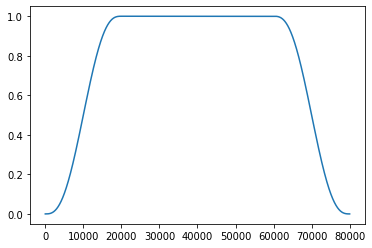

In [10]:
### Set the plasma density profile
a = 20000
n_i = 0.0
n_f = 1.0
N=2001
###

s,fs = warren_ramp(a,n_i,n_f,N)
# s = np.append(s,s[-1]+a)
# fs = np.append(fs,fs[-1])
s_downramp = s + 3 * a
fs_downramp = fs[::-1]
s = np.append(s,s_downramp)
fs = np.append(fs,fs_downramp)
plt.plot(s,fs)
plt.show()

$$\beta_m(z) = \sqrt{2\gamma}\frac{c}{\omega_p(z)}$$
$$\beta_m(z)^2 n_p(z) = const = \beta_{m0}^2 n_{p0} = 2\gamma$$
(In simulation, usually we take the peak density to be 1, and uses normalized units for $\beta$)
So:
$$\beta_m(z) = \sqrt{\frac{2\gamma}{n_p(z)}}$$

In [11]:
### set beam's energy
gamma = 48786
###

density_threshold = 0.01
idx = [i for i,a in enumerate(fs) if a > density_threshold][0]

# beta_m = get_beta_m(fs[idx:],gamma)
# alpha_m = get_alpha_m(s[idx:],beta_m)
# plt.figure(1)
# plt.plot(s[idx:],beta_m)
# plt.xlabel('$z$')
# plt.ylabel('$\\beta_m$')
# plt.figure(2)
# plt.plot(s[idx:],alpha_m)
# plt.xlabel('$z$')
# plt.ylabel('$\\alpha_m$')
# plt.show()

In [12]:
s[idx]

2120.0

# make the input file

Now we make the input file. We assume the beam energy is $\gamma = 48786$ (25 GeV), $\epsilon_n = 0.1 \mu m$, $\sigma_z = 10 \mu m$, $N = 10^{10}$ electrons. 
We choose $\beta^* = 10 \sqrt{2\gamma}$, in other words, at the beam's focal plane, it is matched to the uniform plasma with a density of 1/100 the peak density (because $\beta = \sqrt{2 \gamma}$ is matched to the peak density)

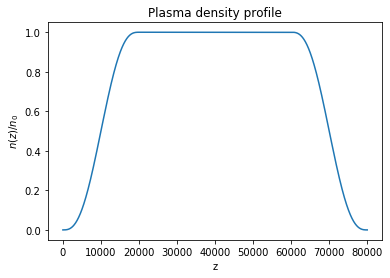

The initial spot size is: 0.023568766663144735


In [17]:
from helper import *
### Set plasma parameters
n0 = 10 ** 17
set_plasma_density(s,fs,name = 'species',idx = 0,path = '..')
get_density_profile(name = 'species', idx = 0, plot = True, save=False, path = '..')
### Set beam parameters
gamma = 48786
N = 1.0 * 10 ** 10 
sigma_z = normalize(10,'um',n0)
set_one_item('beam',0,'sigmaz',sigma_z,path = '..')
set_one_item('beam',0,'gamma',gamma,path = '..')
beta_star = 10 * np.sqrt(2 * gamma)
s_focal = s[idx]
set_Twiss_at_entrance(0,beta_star,s_focal)
epsilon_n = normalize(0.1,'um',n0)
set_one_item('beam',0,'emittance',[epsilon_n,epsilon_n])

set_beam_peak_density(idx = 0,N = N,path= '..',QPAD = True)

### Set simulation parameters
set_ndump(ndump = 20,path = '..')

print('The initial spot size is:',get_init_spot_size(i=0,path = '..',QPAD = True))